In [4]:
import numpy as np
import matplotlib.pyplot as plt

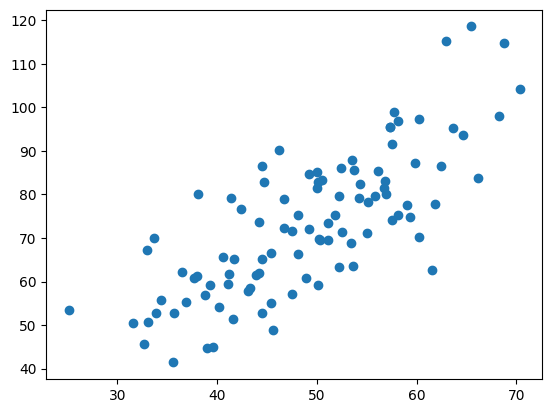

In [26]:
data = np.genfromtxt("data/data.csv", delimiter=',', skip_header=1)
x = data[:, 0]
y = data[:, 1]
plt.scatter(x, y)

In [31]:
def cal_lost(data, w, b):
    size = len(data)
    lost = 0
    for i in range(size):
        lost += (data[i, 1] - w * data[i, 0] - b) ** 2
    return lost / size

Least Square method

In [20]:
def get_avg(data):
    size = len(data)
    total_num = 0
    for i in range(size):
        total_num += data[i]
    return total_num / size

In [28]:
def fit(data):
    size = len(data)
    x_avg = get_avg(data[:, 0])
    w1 = 0
    w2 = 0
    for i in range(size):
        w1 += data[i, 1] * (data[i, 0] - x_avg)
        w2 += data[i, 0] ** 2
    w2 -= size * (x_avg ** 2)
    w = w1 / w2
    b = 0
    for i in range(size):
        b += data[i, 1] - w * data[i, 0]
    b = b / size
    return w, b

In [32]:
w, b = fit(data)
print(f"w:{w},b:{b}")
print(cal_lost(data, w, b))

w:1.287357370010954,b:9.908606190325429
107.47043700950901


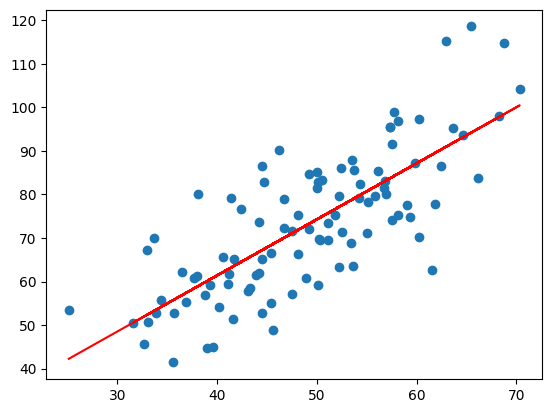

In [27]:
plt.scatter(x, y)
pre_y = w * x + b
plt.plot(x, pre_y, c='r')

Gradient Boosting

In [88]:
init_w, init_b, step, iter_num = 0, 0, 0.0001, 100

In [56]:
def update_params(cur_w, cur_b, step, data):
    size = len(data)
    w, b = 0, 0
    for i in range(size):
        x = data[i, 0]
        y = data[i, 1]
        w += (cur_w * x + cur_b - y) * x
        b += (cur_w * x + cur_b - y)
    w = cur_w - step * (2 * w / size)
    b = cur_b - step * (2 * b / size)
    return (w, b)

111.05814972975426


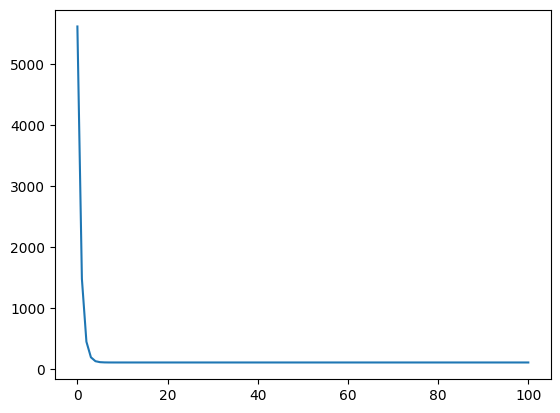

In [89]:
w, b = init_w, init_b
lost_list = [cal_lost(data, w, b)]
for i in range(iter_num):
    (w, b) = update_params(w, b, step, data)
    lost = cal_lost(data, w, b)
    lost_list.append(lost)

print(lost_list[len(lost_list) - 1])
plt.plot(lost_list)

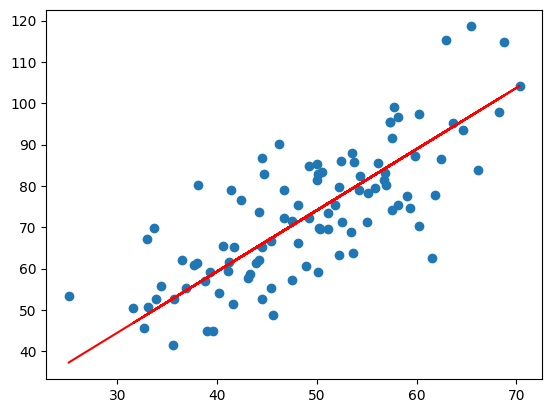

In [90]:
plt.scatter(data[:, 0], data[:, 1])
pred_y = w * data[:, 0] + b
plt.plot(data[:, 0], pred_y, c='r')

Call lib

In [91]:
from sklearn.linear_model import LinearRegression

In [93]:
lr = LinearRegression()
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
lr.fit(x, y)

LinearRegression()

In [97]:
w = lr.coef_
b = lr.intercept_
cost = cal_lost(data, w, b)
print(f"w:{w},b:{b},cost:{cost}")

w:[[1.28735737]],b:[9.90860619],cost:[[107.47043701]]
